# Importando Bibliotecas

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn .metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

# Arquivo usado no projeto

In [202]:
#Importando arquivo
df = pd.read_csv('/content/train_churn.csv', sep = ';')
df

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,Masculino,0.0,NaN,Sim,15.0,Sim,Não,Fibra óptica,Sim,...,Não,Não,Mensal,Não,Cheque por Carta,75.10,1151.55,4.0,0.0,0.0
4996,4502,Masculino,0.0,Não,Não,55.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,96.80,5283.95,NaN,4.0,1.0
4997,3077,Masculino,0.0,Sim,Não,45.0,Sim,Não,NaN,Sim,...,Não,Não,2 Anos,Não,Cartão de Crédito (Automático),53.30,2296.25,0.0,0.0,0.0
4998,3798,Masculino,0.0,Não,Não,42.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,100.30,4222.95,0.0,0.0,0.0


# Editando o dataset

In [203]:
#Renomenado coluna 	Unnamed: 0
df.rename(columns={'Unnamed: 0': 'IDcliente'}, inplace=True)

In [204]:
df_val = df.iloc[:10]
df_val

,IDcliente,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0
5,5261,Masculino,1.0,Sim,Não,54.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,2 Anos,Sim,Cheque Eletrônico,110.45,6077.75,1.0,0.0,0.0
6,6435,Masculino,0.0,NaN,Sim,-2.0,NaN,Sem serviço de telefone,DSL,Não,...,NaN,Não,2 Anos,Não,Cheque por Carta,50.20,2554,0.0,2.0,0.0
7,3983,Masculino,0.0,Não,Não,1.0,Não,Sem serviço de telefone,DSL,Não,...,Não,Não,Mensal,Sim,Cheque Eletrônico,24.25,24.25,1.0,0.0,1.0
8,3262,Feminino,NaN,Sim,Sim,34.0,Sim,Sim,Fibra óptica,Não,...,Sim,Não,Mensal,Não,Cheque Eletrônico,87.45,2874.15,0.0,4.0,1.0
9,3227,Masculino,0.0,Sim,Sim,12.0,Sim,Não,DSL,Não,...,Sim,Não,Mensal,Sim,Cheque por Carta,56.30,628.65,0.0,0.0,0.0


In [205]:
df.dtypes

IDcliente                  int64
genero                    object
idoso                    float64
parceiro                  object
dependentes               object
tempoDeServico           float64
ServicoTelefone           object
MultiLinhas               object
ServicoInternet           object
ServicoSegurancaCyber     object
ServicoBackup             object
SeguroDispositivos        object
ServicoSuporteTecnico     object
StreamingTV               object
StreamingFilmes           object
Contrato                  object
BillingDigital            object
MetodoPagamento           object
FaturaMensal             float64
FaturaTotal               object
NumTickets               float64
NumTicketsTecnico        float64
Churn                    float64
dtype: object

In [206]:
#Verifica vazio
df[df.FaturaTotal.isna()]

,IDcliente,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
21,5013,Masculino,1.0,Não,Não,23.0,Não,Sem serviço de telefone,DSL,Não,...,Não,Sim,Mensal,Sim,Transferência Bancária (Automática),34.65,NaN,0.0,0.0,0.0
31,4167,Feminino,0.0,Sim,Não,50.0,NaN,Sim,DSL,Não,...,Sim,Sim,1 Ano,Não,Transferência Bancária (Automática),NaN,NaN,0.0,0.0,0.0
53,4934,Feminino,0.0,Sim,Não,72.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Sim,2 Anos,Sim,Cheque Eletrônico,110.75,NaN,0.0,0.0,0.0
100,2517,Masculino,1.0,Não,Não,1.0,Sim,Não,Fibra óptica,Não,...,Não,Não,Mensal,Sim,Transferência Bancária (Automática),69.50,NaN,0.0,0.0,1.0
126,2101,Feminino,0.0,Sim,Não,37.0,Sim,Sim,Fibra óptica,NaN,...,Não,NaN,1 Ano,Sim,Cheque Eletrônico,99.20,NaN,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,5846,NaN,0.0,Não,Não,3.0,Sim,Sim,Fibra óptica,Não,...,Não,Não,Mensal,Não,Cheque Eletrônico,76.10,NaN,4.0,0.0,0.0
4930,6869,Feminino,0.0,Sim,Sim,45.0,Sim,NaN,DSL,Não,...,Não,Não,1 Ano,Sim,Cartão de Crédito (Automático),54.15,NaN,0.0,0.0,1.0
4941,4251,Feminino,0.0,Sim,Sim,24.0,Não,Sem serviço de telefone,DSL,Sim,...,Não,Sim,2 Anos,Sim,Cheque por Carta,52.50,NaN,0.0,0.0,0.0
4943,5382,Masculino,0.0,Sim,Sim,56.0,Não,Sem serviço de telefone,DSL,Sim,...,Sim,Não,1 Ano,Sim,NaN,52.00,NaN,0.0,0.0,0.0


In [207]:
# Removendo todos os NaN do dataset
df = df.dropna()

In [208]:
# Removendo todos os valores negativos das colunas
df = df[df['FaturaMensal'] >= 0]
df = df[df['tempoDeServico'] >= 0]

In [209]:
# Converter a coluna float em int
df['idoso'] = df['idoso'].astype(int)
df['Churn'] = df['Churn'].astype(int)
df['NumTicketsTecnico'] = df['NumTicketsTecnico'].astype(int)
df['NumTickets'] = df['NumTickets'].astype(int)

# Analise de gráficos

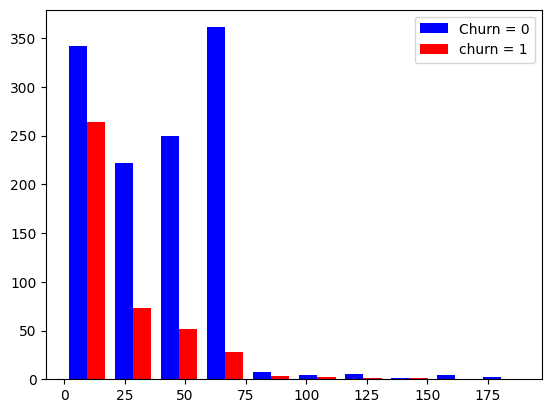

In [210]:
#Grafico de Tempo de serviço
dfnao = df[df.Churn==0].tempoDeServico
dfsim = df[df.Churn==1].tempoDeServico

plt.hist([dfnao, dfsim], color=['blue', 'red'], label=['Churn = 0', 'churn = 1' ])
plt.legend()

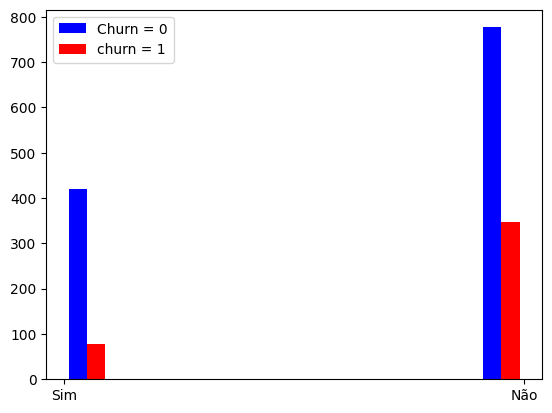

In [211]:
#Grafico de Dependentes
dfnao = df[df.Churn==0].dependentes
dfsim = df[df.Churn==1].dependentes

plt.hist([dfnao, dfsim], color=['blue', 'red'], label=['Churn = 0', 'churn = 1' ])
plt.legend()

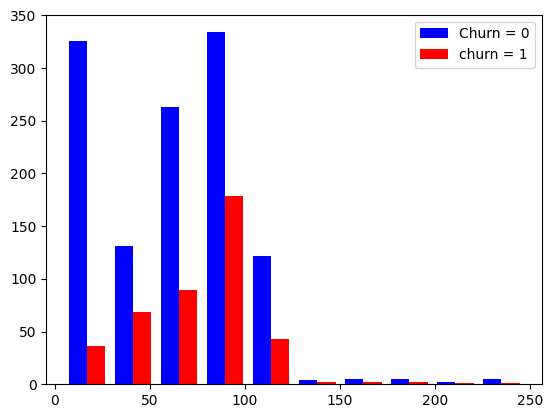

In [212]:
#Grafico de Fatura Mensal
dfnao = df[df.Churn==0].FaturaMensal
dfsim = df[df.Churn==1].FaturaMensal

plt.hist([dfnao, dfsim], color=['blue', 'red'], label=['Churn = 0', 'churn = 1' ])
plt.legend()

NAO: 1197 SIM: 424 % NAO: 26.16


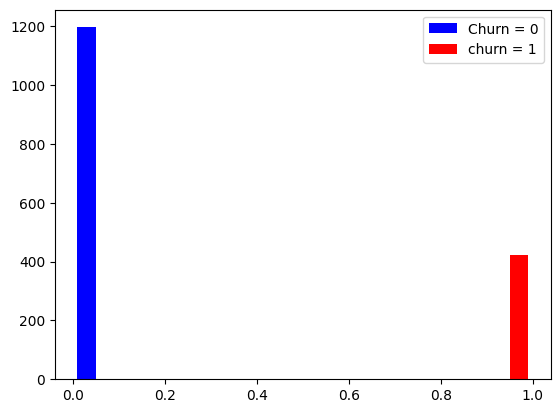

In [213]:
# Balanceamento do dataset
dfnao = df[df.Churn==0].Churn
dfsim = df[df.Churn==1].Churn

total = dfnao.count() + dfsim.count()
percent = round((dfsim.count()/total)*100, 2)

print(f'NAO: {dfnao.count()}', f'SIM: {dfsim.count()}', f'% NAO: {percent}')

plt.hist([dfnao, dfsim], color=['blue', 'red'], label=['Churn = 0', 'churn = 1' ])
plt.legend()

In [214]:
#Verificando padrão
for i in df:
  if df[i].dtypes=='object':
    print(f'{i}:{df[i].unique()}')

genero:['Masculino' 'Feminino']
parceiro:['Sim' 'Não']
dependentes:['Sim' 'Não']
ServicoTelefone:['Sim' 'Não']
MultiLinhas:['Sim' 'Não' 'Sem serviço de telefone']
ServicoInternet:['Não' 'DSL' 'Fibra óptica']
ServicoSegurancaCyber:['Sem serviço de internet' 'Sim' 'Não']
ServicoBackup:['Sem serviço de internet' 'Não' 'Sim']
SeguroDispositivos:['Sem serviço de internet' 'Sim' 'Não']
ServicoSuporteTecnico:['Sem serviço de internet' 'Sim' 'Não']
StreamingTV:['Sem serviço de internet' 'Sim' 'Não']
StreamingFilmes:['Sem serviço de internet' 'Sim' 'Não']
Contrato:['2 Anos' 'Mensal' '1 Ano']
BillingDigital:['Não' 'Sim']
MetodoPagamento:['Transferência Bancária (Automática)' 'Cartão de Crédito (Automático)'
 'Cheque Eletrônico' 'Cheque por Carta']
FaturaTotal:['809.25' '5555.3' '6077.75' ... '266.6' '6045.9' '4222.95']


In [215]:
#Padronizando linhas das colunas
df.replace('Sem serviço de internet', 'Não', inplace = True)
df.replace('Sem serviço de telefone', 'Não', inplace = True)

In [216]:
df.head()

,IDcliente,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0,Sim,Sim,35.0,Sim,Sim,Não,Não,...,Não,Não,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0,0,0
2,5308,Feminino,0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0,0,0
5,5261,Masculino,1,Sim,Não,54.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,2 Anos,Sim,Cheque Eletrônico,110.45,6077.75,1,0,0
7,3983,Masculino,0,Não,Não,1.0,Não,Não,DSL,Não,...,Não,Não,Mensal,Sim,Cheque Eletrônico,24.25,24.25,1,0,1
9,3227,Masculino,0,Sim,Sim,12.0,Sim,Não,DSL,Não,...,Sim,Não,Mensal,Sim,Cheque por Carta,56.30,628.65,0,0,0


In [217]:
dfnum = pd.get_dummies(df, columns=['genero','parceiro','dependentes','ServicoTelefone','MultiLinhas',
                                         'ServicoInternet', 'ServicoSegurancaCyber',
                                         'ServicoBackup','SeguroDispositivos','ServicoSuporteTecnico',
                                         'StreamingTV','StreamingFilmes','Contrato','BillingDigital',
                                         'MetodoPagamento'])

dfnum.columns

Index(['IDcliente', 'idoso', 'tempoDeServico', 'FaturaMensal', 'FaturaTotal',
       'NumTickets', 'NumTicketsTecnico', 'Churn', 'genero_Feminino',
       'genero_Masculino', 'parceiro_Não', 'parceiro_Sim', 'dependentes_Não',
       'dependentes_Sim', 'ServicoTelefone_Não', 'ServicoTelefone_Sim',
       'MultiLinhas_Não', 'MultiLinhas_Sim', 'ServicoInternet_DSL',
       'ServicoInternet_Fibra óptica', 'ServicoInternet_Não',
       'ServicoSegurancaCyber_Não', 'ServicoSegurancaCyber_Sim',
       'ServicoBackup_Não', 'ServicoBackup_Sim', 'SeguroDispositivos_Não',
       'SeguroDispositivos_Sim', 'ServicoSuporteTecnico_Não',
       'ServicoSuporteTecnico_Sim', 'StreamingTV_Não', 'StreamingTV_Sim',
       'StreamingFilmes_Não', 'StreamingFilmes_Sim', 'Contrato_1 Ano',
       'Contrato_2 Anos', 'Contrato_Mensal', 'BillingDigital_Não',
       'BillingDigital_Sim', 'MetodoPagamento_Cartão de Crédito (Automático)',
       'MetodoPagamento_Cheque Eletrônico', 'MetodoPagamento_Cheque por Carta',

In [218]:
dfnum.head()

,IDcliente,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn,genero_Feminino,genero_Masculino,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,6027,0,35.0,25.45,809.25,0,0,0,False,True,...,False,False,True,False,True,False,False,False,False,True
2,5308,0,69.0,82.45,5555.3,0,0,0,True,False,...,True,False,True,False,False,True,True,False,False,False
5,5261,1,54.0,110.45,6077.75,1,0,0,False,True,...,True,False,True,False,False,True,False,True,False,False
7,3983,0,1.0,24.25,24.25,1,0,1,False,True,...,False,False,False,True,False,True,False,True,False,False
9,3227,0,12.0,56.30,628.65,0,0,0,False,True,...,False,False,False,True,False,True,False,False,True,False


In [219]:
#Binarizando dataset
dfnum.replace({'Sim': 1, 'Não': 0}, inplace=True)
dfnum.replace({False: 0, True: 1}, inplace=True)
dfnum.replace({	'Masculino': 0, 'Feminino': 1}, inplace=True)

In [220]:
dfnum.sample(5)

,IDcliente,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn,genero_Feminino,genero_Masculino,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
2092,2100,0,69.0,99.50,6841.45,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1
1278,3944,0,9.0,20.25,172.35,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4050,5407,0,63.0,63.55,4014.2,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4435,1139,1,14.0,19.65,228.65,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2242,3689,1,1.0,71.15,71.15,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0


In [221]:
#Label encoder
le= LabelEncoder()
dfnum['Churn'] = le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

2914    0
4992    0
4572    0
175     1
260     1
252     0
1892    0
2666    1
1191    1
2532    0
77      1
98      0
4028    1
4693    0
1968    0
Name: Churn, dtype: int64

# Descrição
Masculino = 0 // Feminino = 1


Sim = 1 // Não = 0


In [222]:
dfnum

,IDcliente,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn,genero_Feminino,genero_Masculino,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,6027,0,35.0,25.45,809.25,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,5308,0,69.0,82.45,5555.3,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
5,5261,1,54.0,110.45,6077.75,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7,3983,0,1.0,24.25,24.25,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
9,3227,0,12.0,56.30,628.65,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,3581,0,63.0,74.50,4674.55,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4987,5771,0,12.0,20.40,266.6,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
4990,2935,0,71.0,86.10,6045.9,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
4992,6840,0,1.0,19.30,19.3,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


In [227]:
# Verificar se há valores vazios em todo o DataFrame
valores_vazios = dfnum.isna().sum()

# Exibir os valores vazios encontrados
print(valores_vazios)

IDcliente                                              0
idoso                                                  0
tempoDeServico                                         0
FaturaMensal                                           0
FaturaTotal                                            4
NumTickets                                             0
NumTicketsTecnico                                      0
Churn                                                  0
genero_Feminino                                        0
genero_Masculino                                       0
parceiro_Não                                           0
parceiro_Sim                                           0
dependentes_Não                                        0
dependentes_Sim                                        0
ServicoTelefone_Não                                    0
ServicoTelefone_Sim                                    0
MultiLinhas_Não                                        0
MultiLinhas_Sim                

In [226]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 4998
Data columns (total 42 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   IDcliente                                            1621 non-null   int64  
 1   idoso                                                1621 non-null   int64  
 2   tempoDeServico                                       1621 non-null   float64
 3   FaturaMensal                                         1621 non-null   float64
 4   FaturaTotal                                          1617 non-null   float64
 5   NumTickets                                           1621 non-null   int64  
 6   NumTicketsTecnico                                    1621 non-null   int64  
 7   Churn                                                1621 non-null   int64  
 8   genero_Feminino                                      1621 non-null   int6

# Quando convertido int para float, estão se criando 4 valores NaN no dataset

Após converter de int para float fazer o drop NaN

In [225]:
#Convertendo int em float
def convert_to_float(value):

  try:
    return float(value)
  except ValueError:
    return np.nan

for column in ['tempoDeServico','FaturaMensal','FaturaTotal']:
  dfnum[column] = dfnum[column].apply(convert_to_float)

# Verificando df
dfnum[['tempoDeServico','FaturaMensal','FaturaTotal']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tempoDeServico  1621 non-null   float64
 1   FaturaMensal    1621 non-null   float64
 2   FaturaTotal     1617 non-null   float64
dtypes: float64(3)
memory usage: 50.7 KB


In [ ]:
dfnum.isna()

In [228]:
# Remova todos os NaN do dataset antes de fazer o MinMaxScaler()
dfnum = dfnum.dropna()

In [229]:
scaler = MinMaxScaler()
dfnum[['tempoDeServico','FaturaMensal','FaturaTotal']] = scaler.fit_transform(dfnum[['tempoDeServico','FaturaMensal','FaturaTotal']])
dfnum.sample(5)

<ipython-input-229-4740137d909b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum[['tempoDeServico','FaturaMensal','FaturaTotal']] = scaler.fit_transform(dfnum[['tempoDeServico','FaturaMensal','FaturaTotal']])


,IDcliente,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn,genero_Feminino,genero_Masculino,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
142,757,0,0.310526,0.061364,0.004443,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1361,2633,0,0.342105,0.393182,0.772498,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2815,2340,0,0.805263,0.165289,0.253892,0,0,0,1,0,...,1,1,0,0,1,0,1,0,0,0
4273,4513,1,0.378947,0.361364,0.748796,0,8,1,1,0,...,1,0,1,0,1,0,1,0,0,0
115,2628,0,0.005263,0.323967,0.007498,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [230]:
#Separar features e labels
features = dfnum.drop('Churn', axis=1)
label = dfnum['Churn']

In [231]:
# Parte para validação
val = features.head(10)
val

,IDcliente,idoso,tempoDeServico,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,genero_Feminino,genero_Masculino,parceiro_Não,...,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,BillingDigital_Não,BillingDigital_Sim,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,6027,0,0.184211,0.084504,0.092143,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,5308,0,0.363158,0.320041,0.645598,0,0,1,0,1,...,1,0,1,0,0,1,1,0,0,0
5,5261,1,0.284211,0.435744,0.706523,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7,3983,0,0.005263,0.079545,0.000601,1,0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
9,3227,0,0.063158,0.211983,0.071082,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
10,1700,0,0.247368,0.063843,0.107740,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
11,3110,0,0.005263,0.058264,0.000000,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
12,3103,1,0.005263,0.059711,0.000041,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
22,6022,0,0.105263,0.057438,0.038314,2,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
25,349,1,0.336842,0.380165,0.747706,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,1


In [232]:
#Novo feature
features = features.iloc[10:]
label = label.iloc[10:]

In [233]:
#Separa entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=20, random_state=40)

In [234]:
print(X_train.shape, y_train.shape)

(1587, 41) (1587,)


In [237]:
model = Sequential([
Dense(20, input_shape=(41,), activation='relu'),
Dense(52, activation='relu'),
Dense(1, activation='sigmoid')
])

#Passando parametros de execução
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [238]:
#Treinamento

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 2.1424 - accuracy: 0.6396
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.8729 - accuracy: 0.6383
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.9870 - accuracy: 0.6560
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.7824 - accuracy: 0.6912
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 1.5572 - accuracy: 0.6616
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 1.7487 - accuracy: 0.6333
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 1.8846 - accuracy: 0.6547
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1620 - accuracy: 0.6856
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7309
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 1.5023 - accuracy: 0.7051
Epoch 11/

In [239]:
pred_val = model.predict(val)
print(pred_val)

1/1 [==============================] - 0s 62ms/step
[[0.09164981]
 [0.11274467]
 [0.26779696]
 [0.9940706 ]
 [0.8069519 ]
 [0.01351968]
 [0.7664528 ]
 [0.9735361 ]
 [0.9818298 ]
 [0.00301478]]


In [240]:
y_pred = []
for i in pred_val:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

cliente = df_val['IDcliente']
real = df_val['Churn']
pred = list(pred_val.flatten())

df=pd.DataFrame({'cliente':cliente, 'previsao':pred, 'real':real,'churn':y_pred})

print(df)

   cliente  previsao  real  churn
0     6027  0.091650   0.0      0
1     1961  0.112745   0.0      0
2     5308  0.267797   0.0      0
3     3587  0.994071   1.0      1
4      576  0.806952   0.0      1
5     5261  0.013520   0.0      0
6     6435  0.766453   0.0      1
7     3983  0.973536   1.0      1
8     3262  0.981830   1.0      1
9     3227  0.003015   0.0      0


<Axes: xlabel='churn', ylabel='real'>

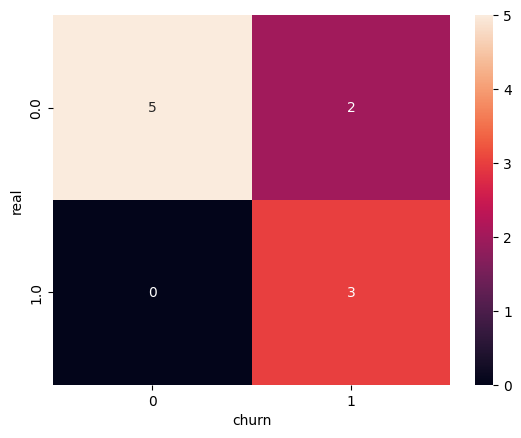

In [243]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(df, columns=['real', 'churn'])
confusion_matrix = pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['churn'])

sns.heatmap(confusion_matrix, annot=True)